# CCD Photometry with 1.4m Milankovic telescope: basic data reduction and aperture photometry of AGN

Astrophysical data reduction and analysis techniques 2024/25.

Thara Rubi Caba Pineda 

Lecturer: Prof. Dragana Ilic

## Project Aim

For the below objects observed on October 22, 2023 with 1.4m Milankovic, using iKonL CCD in the following filter: B, V, R, Ha, SII, red-continuum, perform the standard data reduction procedure and calculate aperture photometry to measure the flux of the AGN.
1. Mrk335 00 06 19 +20 12 10 V=13.85
2. Mrk6 06 52 12 +74 25 37 V=14.19
3. Mrk817 14 36 22 +58 47 39 V=12.8 

Note: some calibration files have been aquired on Oct 22, 2023 using different CCD readout mode, thus
you can use the calibration files from Oct 14, 2023 (data also provided).

## Project Tasks

1. Perform basic CDD image reduction in all filters for at least one object, using the pipeline for 1.4
Milankovic telescope: https://github.com/anavudragovic/pipeline ;
2. Obtain instrumental magnitudes. Experiment with the aperture radius and test how much the
object magnitude changes.
3. Perform absolute photometric calibration. For the standard stars use the stars from the same
field (check literature or previous tutorials), check the results with several stars.

### Task 1

Installed the necessary dependencies to use the pipeline. Move the calibration files (flat, bias, dark) from 14_10_2023 into the working directory with the observations 22_10_2023. Inside this folder clone the GitHub repository

`git clone https://github.com/anavudragovic/pipeline`

Then run the pipeline code on our files `python pipeline/reduce.py -c -b -s`

Now we check our images to make sure there are no light sources.

In [1]:
#import the necessary packages
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
import os
from os import listdir
import pandas as pd
import numpy as np
from astroquery.simbad import Simbad

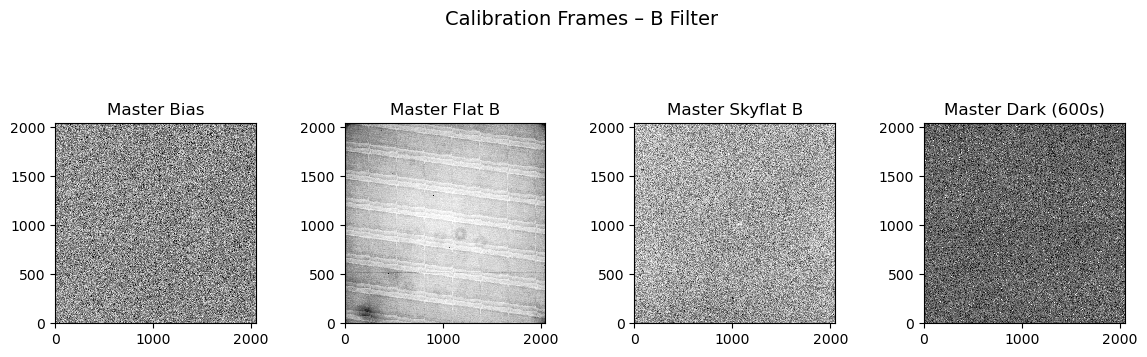

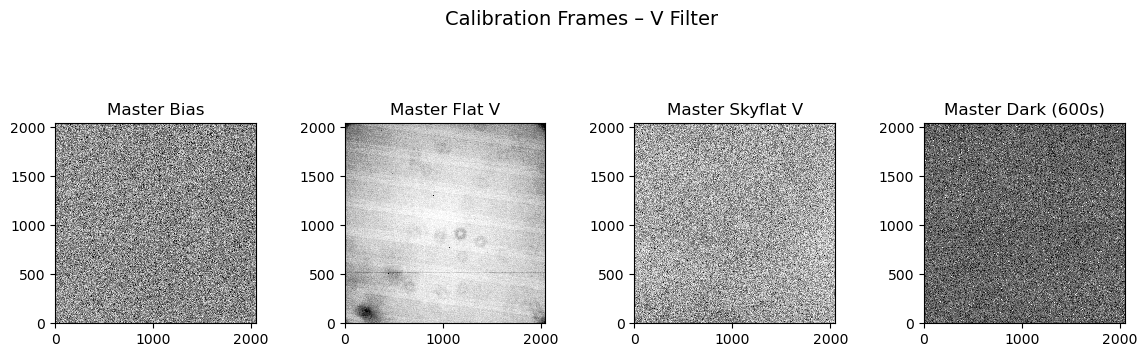

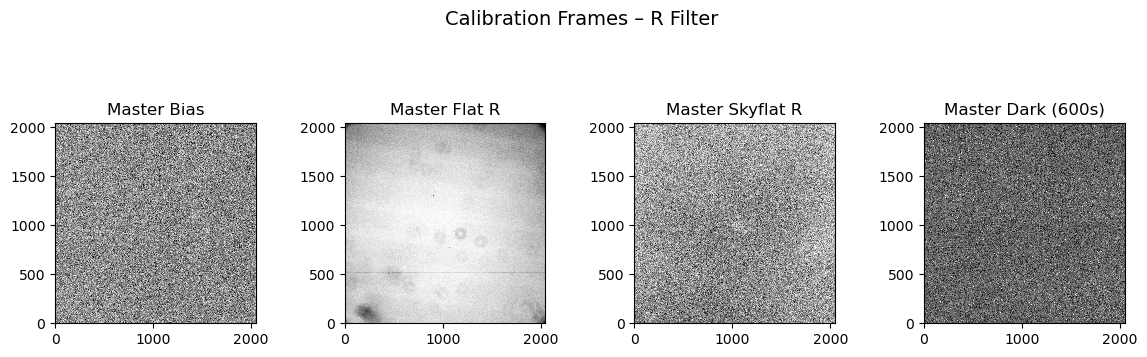

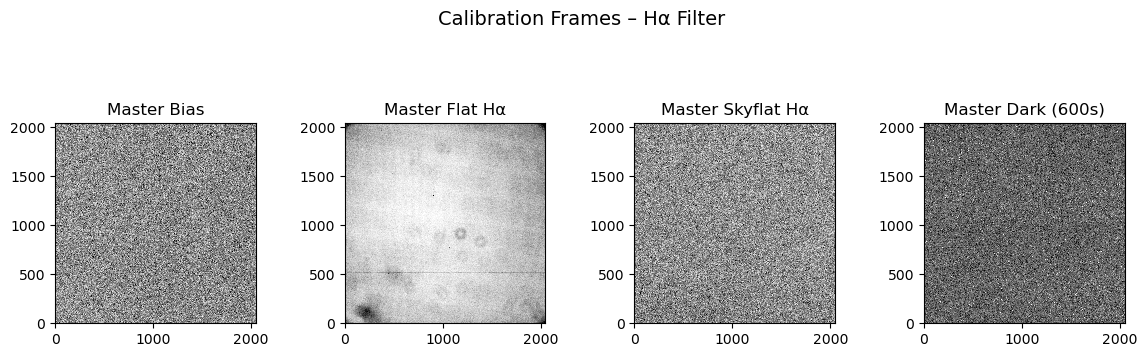

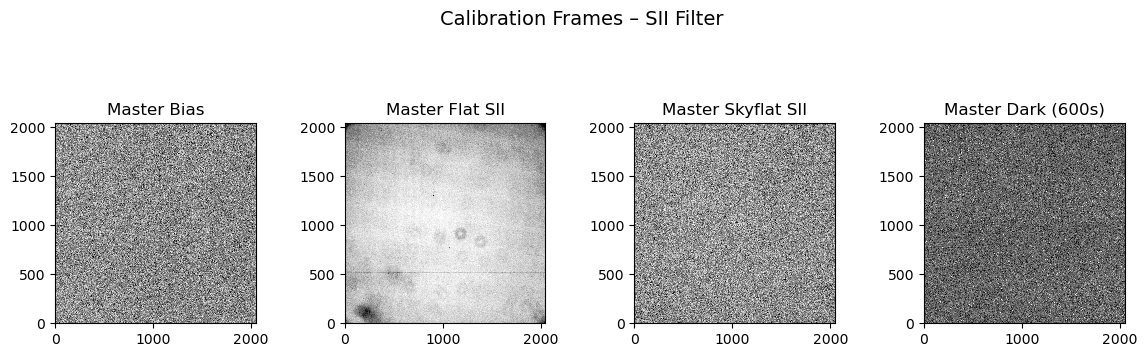

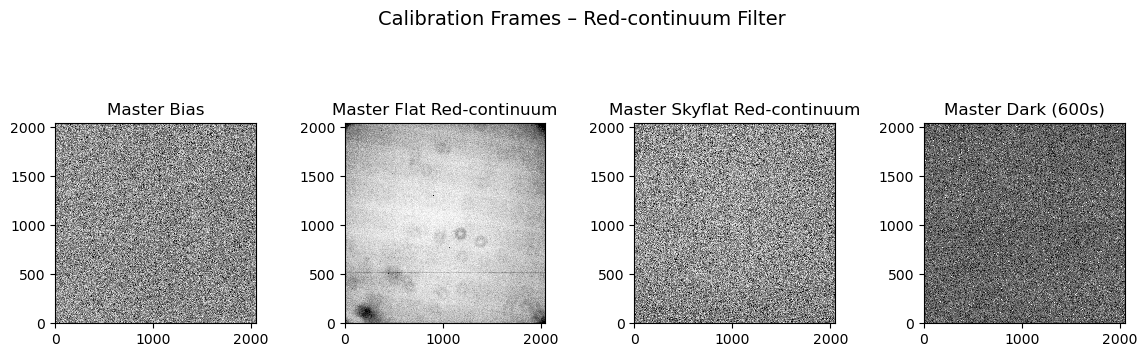

In [2]:
# Set the working directory for calibration files
calib_dir = '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/calibration'

# Define filters and mapping if needed
filters = ['B', 'V', 'R', 'Ha', 'SII', 'HaContinuum']  # "HaContinuum" is the file suffix
filter_titles = {
    'B': 'B',
    'V': 'V',
    'R': 'R',
    'Ha': 'Hα',
    'SII': 'SII',
    'HaContinuum': 'Red-continuum'
}

# Load master bias and dark
bias = fits.getdata(os.path.join(calib_dir, 'mBias.fits'))
dark = fits.getdata(os.path.join(calib_dir, 'mDark_600sec.fits'))

# Get ZScale limits for fixed frames
z = ZScaleInterval()
zminb, zmaxb = z.get_limits(bias)
zmind, zmaxd = z.get_limits(dark)

# Loop through each filter
for filt in filters:
    flat_path = os.path.join(calib_dir, f'mFlat_{filt}.fits')
    skyflat_path = os.path.join(calib_dir, f'mSkyflat_{filt}.fits')

    if not os.path.exists(flat_path) or not os.path.exists(skyflat_path):
        print(f"Skipping {filt}: flat or skyflat not found.")
        continue

    flat = fits.getdata(flat_path)
    skyflat = fits.getdata(skyflat_path)
    zminf, zmaxf = z.get_limits(flat)
    zmins, zmaxs = z.get_limits(skyflat)

    # Create figure
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(12, 4), ncols=4)
    fig.suptitle(f'Calibration Frames – {filter_titles[filt]} Filter', fontsize=14)
    fig.tight_layout(pad=3.0)

    ax1.imshow(bias, origin='lower', cmap='Greys_r', vmin=zminb, vmax=zmaxb, interpolation='nearest')
    ax1.set_title('Master Bias')

    ax2.imshow(flat, origin='lower', cmap='Greys_r', vmin=zminf, vmax=zmaxf, interpolation='nearest')
    ax2.set_title(f'Master Flat {filter_titles[filt]}')

    ax3.imshow(skyflat, origin='lower', cmap='Greys_r', vmin=zmins, vmax=zmaxs, interpolation='nearest')
    ax3.set_title(f'Master Skyflat {filter_titles[filt]}')

    ax4.imshow(dark, origin='lower', cmap='Greys_r', vmin=zmind, vmax=zmaxd, interpolation='nearest')
    ax4.set_title('Master Dark (600s)')

    plt.show()

### Task 2

Ran `python pipeline/reduce.py -a -p -l`

And then perform photometry for a range of FWHM from  pixels: `python /home/data/ reduce.py -a -p -l -x i` then move these individual photometry files to a different folder.

In [3]:
target_names = ['Mrk6', 'Mrk335', 'Mrk817']

main_dir = '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/all_photometry_files/'

photometry_dirs = [main_dir + file + '/' for file in listdir(main_dir) if 'photometry' in file]
photometry_dirs

['/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/all_photometry_files/x6_photometry/',
 '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/all_photometry_files/x3_photometry/',
 '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/all_photometry_files/x4_photometry/',
 '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/all_photometry_files/x1_photometry/',
 '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/all_photometry_files/x2_photometry/',
 '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/all_photometry_files/x7_photometry/',
 '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/all_photometry_files/x5_photometry/',
 '/Users/tharacaba/D

In [4]:
master_phot_dfs = {}
for target_name in target_names:

    photometry_dir_dict = {}
    for photometry_dir in photometry_dirs:
        photometry_dir_dict[photometry_dir.split('/')[-2].split('_')[0] + '_path'] = photometry_dir + f'{target_name}_photometry.txt'
        df = pd.read_csv(photometry_dir + f'{target_name}_photometry.txt', sep=r'\s+', header=0, comment='#')
        df.sort_values(by=['FILTER', 'FILENAME'], inplace=True, ignore_index=True)
        photometry_dir_dict[photometry_dir.split('/')[-2].split('_')[0] + '_df'] = df


    master_phot_dfs[target_name] = photometry_dir_dict

In [5]:
for target_name, target_name_dict in master_phot_dfs.items():
    for xFWHM, master_phot_df in target_name_dict.items():
        if 'df' in xFWHM:
            master_phot_dfs[target_name][xFWHM] = master_phot_df.query("FILENAME != 'FILENAME'").reset_index(drop=True)

In [6]:
def error_on_mean(errors): return np.sqrt(np.sum(np.square(errors))) / len(errors)

In [7]:
def return_fiter_magnitudes(target_master_phot_dfs):
    df = pd.concat(target_master_phot_dfs)
    df['mag'] = pd.to_numeric(df['mag'])
    df['mag_err'] = pd.to_numeric(df['mag_err'])

    target_dict = {}
    
    filter_grouped = df.groupby(by='FILTER', observed=True)
    for filter_name, filter_df in filter_grouped:
        fwhms = []
        filter_mags = []
        filter_mag_errs = []

        fwhmm_grouped = filter_df.groupby(by='FWHM', observed=True, sort=False)
        for fwhm, fwhm_filter_df in fwhmm_grouped:
            fwhms.append(fwhm)
            filter_mags.append(np.mean(fwhm_filter_df['mag'].to_numpy()))
            filter_mag_errs.append(error_on_mean(fwhm_filter_df['mag_err'].to_numpy()))

        target_dict[filter_name] = np.column_stack([fwhms, filter_mags, filter_mag_errs])
        
    return target_dict

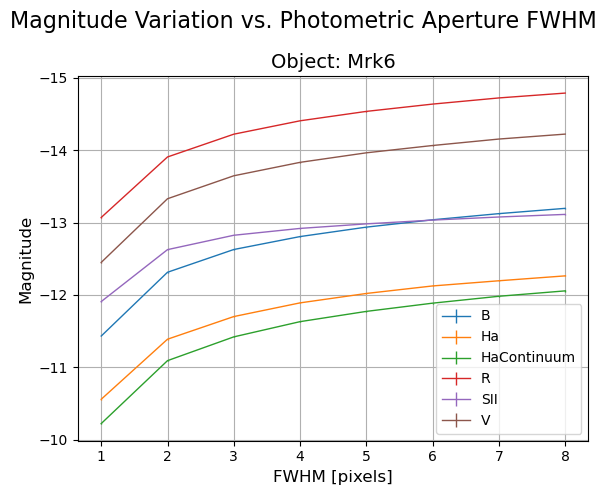

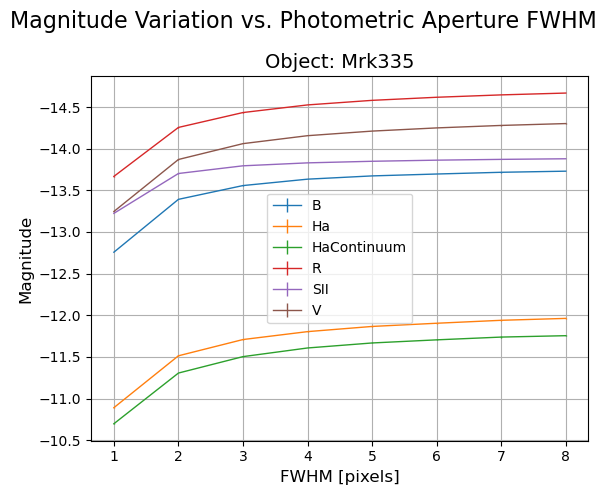

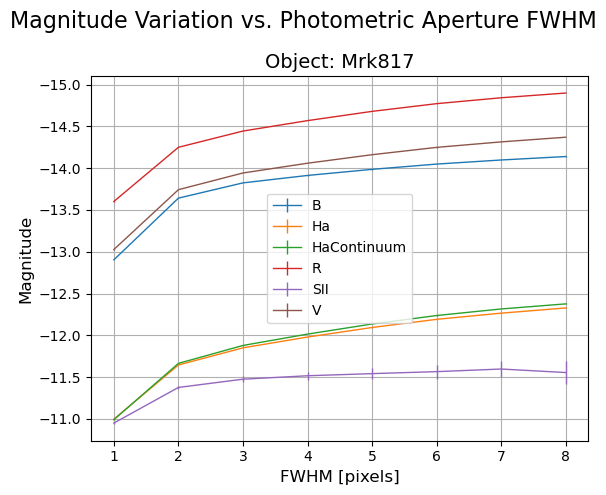

In [8]:
for target_name in master_phot_dfs:
    # Create a new figure for each target
    fig, ax = plt.subplots(figsize=(6, 5))

    # Retrieve magnitude data
    target_dict = return_fiter_magnitudes([master_phot_dfs[target_name][f'x{i}_df'] for i in range(1, 9)])

    for filter_name, array in target_dict.items():
        fwhms = array[:, 0].astype(float)
        mags = array[:, 1].astype(float)
        magerrs = array[:, 2].astype(float)

        ax.errorbar(fwhms, mags, yerr=magerrs, label=f'{filter_name}', linewidth=1)

    ax.yaxis.set_inverted(True)
    ax.set_title(f'Object: {target_name}', fontsize=14)
    ax.set_xlabel('FWHM [pixels]', fontsize=12)
    ax.set_ylabel('Magnitude', fontsize=12)
    ax.legend()
    ax.grid(True)

    plt.suptitle('Magnitude Variation vs. Photometric Aperture FWHM', fontsize=16)
    plt.tight_layout()
    plt.show()  # Show one figure at a time

### Task 3

We do absolute photometry for Mrk 6. We provide the pipeline with the file `Mrk6_stars.txt` and run the pipeline again to perform absolute photometry `python /home/data/ reduce.py -a -p -l`

In [9]:
# Looking at the simbad columns available to us

np.array(Simbad.list_votable_fields()[["name", "description"]]['name'])

array(['mesDiameter', 'mesPM', 'mesISO', 'mesSpT', 'allfluxes', 'ident',
       'flux', 'mesOtype', 'mesPLX', 'otypedef', 'mesDistance', 'otypes',
       'mesVar', 'mesXmm', 'mesVelocities', 'has_ref', 'mesRot', 'biblio',
       'ids', 'mesHerschel', 'mesIUE', 'mesFe_h', 'alltypes', 'basic',
       'dec', 'main_id', 'otype_txt', 'ra', 'coo_bibcode',
       'coo_err_angle', 'coo_err_maj', 'coo_err_maj_prec', 'coo_err_min',
       'coo_err_min_prec', 'coo_qual', 'coo_wavelength', 'dec_prec',
       'galdim_angle', 'galdim_bibcode', 'galdim_majaxis',
       'galdim_majaxis_prec', 'galdim_minaxis', 'galdim_minaxis_prec',
       'galdim_qual', 'galdim_wavelength', 'hpx', 'morph_bibcode',
       'morph_qual', 'morph_type', 'nbref', 'oid', 'otype', 'plx_bibcode',
       'plx_err', 'plx_err_prec', 'plx_prec', 'plx_qual', 'plx_value',
       'pm_bibcode', 'pm_err_angle', 'pm_err_maj', 'pm_err_maj_prec',
       'pm_err_min', 'pm_err_min_prec', 'pm_qual', 'pmdec', 'pmdec_prec',
       'pmra', 'pm

In [10]:
mrk6_companions = ["MRK 6", "GSC 04371-00800", "GSC 04371-00113", "TYC 4371-867-1", "TYC 4371-167-1"]

simbad = Simbad()
simbad.add_votable_fields("B", "V", "R")
result_table = simbad.query_objects(mrk6_companions)
result_table

main_id,ra,dec,coo_err_maj,coo_err_min,coo_err_angle,coo_wavelength,coo_bibcode,R,B,V,user_specified_id,object_number_id
,deg,deg,mas,mas,deg,,,,,,,
object,float64,float64,float32,float32,int16,str1,object,float64,float64,float64,object,int64
IC 450,103.05139427733,74.42697811881,0.0131,0.0172,90,O,2020yCat.1350....0G,--,15.15999984741211,14.1899995803833,MRK 6,1
GSC 04371-00800,103.20178532572001,74.33631203873,0.0114,0.0146,90,O,2020yCat.1350....0G,--,15.239999771118164,14.569999694824219,GSC 04371-00800,2
GSC 04371-00113,102.97633273265,74.3604634424,0.0116,0.014,90,O,2020yCat.1350....0G,14.329999923706055,15.0600004196167,14.4399995803833,GSC 04371-00113,3
TYC 4371-867-1,103.0042668832,74.37944767458,0.0078,0.0097,90,O,2020yCat.1350....0G,--,12.069999694824219,11.15999984741211,TYC 4371-867-1,4
TYC 4371-167-1,102.76098278455001,74.46048226791,0.0134,0.0167,90,O,2020yCat.1350....0G,--,12.8100004196167,11.319999694824219,TYC 4371-167-1,5


In [11]:
result_table = result_table.to_pandas()[["main_id", "user_specified_id", "object_number_id", "B", "V"]]
result_table['object_number_id'] = ['T', 'C1', 'C2', 'C3', 'C4']
result_table

,main_id,user_specified_id,object_number_id,B,V
0,IC 450,MRK 6,T,15.16,14.19
1,GSC 04371-00800,GSC 04371-00800,C1,15.24,14.57
2,GSC 04371-00113,GSC 04371-00113,C2,15.06,14.44
3,TYC 4371-867-1,TYC 4371-867-1,C3,12.07,11.16
4,TYC 4371-167-1,TYC 4371-167-1,C4,12.81,11.32


In [12]:
filter_dict_list = []

for filter in ['B', 'V']:
    filter_dict = {'FILTER': filter}
    for i in range(1, 5):
        filter_dict[f"{result_table.iloc[i]['object_number_id']}"] = result_table.iloc[i][filter]
    filter_dict_list.append(filter_dict)

In [13]:
companion_df = pd.DataFrame(filter_dict_list)
companion_df

,FILTER,C1,C2,C3,C4
0,B,15.24,15.06,12.07,12.81
1,V,14.57,14.44,11.16,11.32


In [14]:
# Results from absolute photometry

main_dir = '/Users/tharacaba/Desktop/Clases/Data_Reduction/wetransfer_22_10_2023-zip_2024-12-25_2044/22_10_2023/'
main_phot_file = 'Mrk6_photometry.txt'

In [15]:
mrk_6_master_photometry = pd.read_csv(main_dir + main_phot_file, sep='\s+')
mrk_6_master_photometry = mrk_6_master_photometry[np.insert(mrk_6_master_photometry.columns[5:9], 0, mrk_6_master_photometry.columns[2])]
mrk_6_master_photometry

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/d2/vc9_lbj902b8n1wlkbw8c1mr0000gn/T/ipykernel_14010/3183646872.py:1: SyntaxWarning: invalid escape sequence '\s'
  mrk_6_master_photometry = pd.read_csv(main_dir + main_phot_file, sep='\s+')


,FILTER,TmC1,TmC2,TmC3,TmC4
0,Ha,-0.024830,0.048134,3.462960,3.724706
1,SII,-1.186392,-1.100109,2.300112,2.569258
2,HaContinuum,0.229930,0.307413,3.680920,3.926610
3,R,0.062001,0.151342,3.032701,3.170580
4,B,0.706347,0.885981,3.554198,3.133908
5,HaContinuum,0.235247,0.314684,3.678985,3.926845
6,V,0.326093,0.446512,3.320485,3.309032
7,SII,-1.184378,-1.102371,2.298041,2.573270
8,Ha,-0.054330,0.024827,3.451931,3.702438
9,B,0.708521,0.885455,3.544730,3.143518


In [16]:
mrk_6_master_photometry = mrk_6_master_photometry.query("FILTER in ['B', 'V']")
mrk_6_master_photometry

,FILTER,TmC1,TmC2,TmC3,TmC4
4,B,0.706347,0.885981,3.554198,3.133908
6,V,0.326093,0.446512,3.320485,3.309032
9,B,0.708521,0.885455,3.544730,3.143518
10,V,0.328918,0.442242,3.257532,3.253784


In [17]:
mrk_6_master_photometry = mrk_6_master_photometry.groupby('FILTER', as_index=False).mean()
mrk_6_master_photometry

,FILTER,TmC1,TmC2,TmC3,TmC4
0,B,0.707434,0.885718,3.549464,3.138713
1,V,0.327505,0.444377,3.289008,3.281408


In [18]:
mrk6_Bmag = (mrk_6_master_photometry.to_numpy()[0][1:] + companion_df.to_numpy()[0][1:]).mean()
mrk6_Vmag = (mrk_6_master_photometry.to_numpy()[1][1:] + companion_df.to_numpy()[1][1:]).mean()

print(f'The B band magnitude of Mrk 6 is {mrk6_Bmag:.3f}')
print(f'The V band magnitude of Mrk 6 is {mrk6_Vmag:.3f}')

The B band magnitude of Mrk 6 is 15.865
The V band magnitude of Mrk 6 is 14.708
